In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
    "name": ["A","B","C"],
    "score": [85,55,72]
})

df

,name,score
0,A,85
1,B,55
2,C,72


In [3]:
df[df["score"] >= 60]

,name,score
0,A,85
2,C,72


In [4]:
#csv 파일 읽기&저장
df = pd.DataFrame({
    "name": ["coffee","tea","juice"],
    "price": [3000, 2500,4000],
    "sales": [120, 80, 60]
})

df

,name,price,sales
0,coffee,3000,120
1,tea,2500,80
2,juice,4000,60


In [5]:
#csv로 저장, index=False는 불필요한 번호 제거 
df.to_csv("products.csv",index=False)

In [6]:
df2 = pd.read_csv("products.csv")
df2

,name,price,sales
0,coffee,3000,120
1,tea,2500,80
2,juice,4000,60


In [7]:
#index=DataFrame의 인덱스(행 번호),False=csv에 저장하지 않겠다.
df.to_csv("products.csv",index=True)

In [8]:
df2 = pd.read_csv("products.csv")
df2

,Unnamed: 0,name,price,sales
0,0,coffee,3000,120
1,1,tea,2500,80
2,2,juice,4000,60


In [9]:
#index를 의미있는 값으로, 다른 옵션들
#df2=df.set_index("name") -- index가 True지만 의미있는 식별자
#header=False 컬럼명까지 제거
#sep=";"쉼표대신 세미콜론

In [10]:
#csv위치 헷갈릴때.
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\data analyst(26.01~)'

In [11]:
df2["revenue"] = df2["price"]*df2["sales"]
df2

,Unnamed: 0,name,price,sales,revenue
0,0,coffee,3000,120,360000
1,1,tea,2500,80,200000
2,2,juice,4000,60,240000


In [12]:
df2.to_csv("products_with_revenue.csv",index=False)

In [13]:
df["sales"].mean()

np.float64(86.66666666666667)

In [14]:
df2["revenue"].mean()

np.float64(266666.6666666667)

In [15]:
df = pd.DataFrame({
    "category": ["drink", "drink", "drink", "food", "food"],
    "product": ["coffee", "tea", "juice", "cake", "sandwich"],
    "sales": [120, 80, 60, 40, 90],
    "price": [3000, 2500, 4000, 5000, 4500]
})
df

,category,product,sales,price
0,drink,coffee,120,3000
1,drink,tea,80,2500
2,drink,juice,60,4000
3,food,cake,40,5000
4,food,sandwich,90,4500


In [16]:
#카테고리별 평균판매량
df.groupby("category")["sales"].mean()

category
drink    86.666667
food     65.000000
Name: sales, dtype: float64

In [17]:
#여러 통계를 한번에
df.groupby("category")["sales"].agg(["mean","sum","count"])

,mean,sum,count
category,,,
drink,86.666667,260,3
food,65.000000,130,2


In [18]:
df["revenue"] = df["sales"]*df["price"]

In [19]:
df.groupby("category")["revenue"].sum()

category
drink    800000
food     605000
Name: revenue, dtype: int64

In [20]:
df.groupby("category")["price"].mean()

category
drink    3166.666667
food     4750.000000
Name: price, dtype: float64

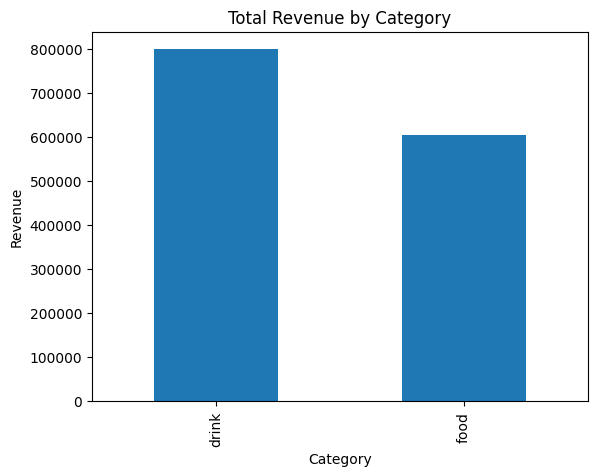

In [21]:
#시각화 나타내기
import matplotlib.pyplot as plt

revenue_sum = df.groupby("category")["revenue"].sum()

#어떤 데이터를. 그래프로(종류)
#그래프 제목()
#그래프 x라벨()
#그래프 y라벨()

revenue_sum.plot(kind="bar")
plt.title("Total Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")

#이미지 저장
plt.savefig("revernue_by_category.png")
plt.show()

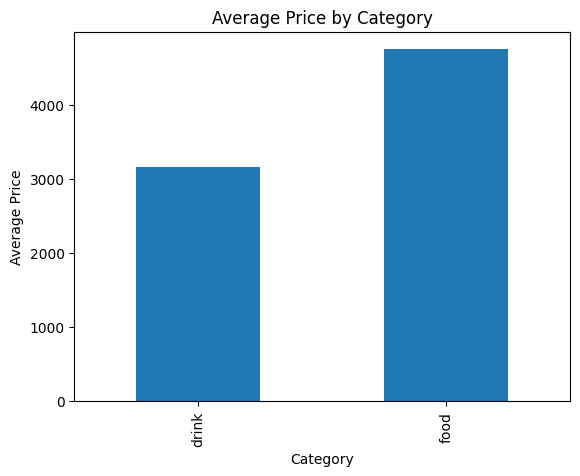

In [22]:
price_mean = df.groupby("category")["price"].mean()

price_mean.plot(kind="bar")
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")

#이미지저장
plt.savefig("average_price_by_category.png")
plt.show()

In [23]:
## 음료가 평균가격이 낮은데도 음식보다 더 높은 매출이 나왔다.
## 음료가 회전율이 빨라 더 많이 팔린다고 해석된다. 
## 음료와 관련된 프로모션 또는 음료 가격인상의 민감도를 알아볼 필요가 있어보인다.